<a href="https://colab.research.google.com/github/ayush7121/HIT140-Foundations-of-Data-Science-2024/blob/main/HIT140_Foundations_of_Data_Science_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: Investigating the Impact of Digital Screen Time on Adolescents’ Well-being**

1. Introduction
Objective: This project aims to analyze how digital screen time affects self-reported well-being among adolescents. We will explore both descriptive and inferential statistics using three datasets containing demographic information, screen time, and well-being indicators.

Datasets Overview:

dataset1.csv: Demographics of respondents.

dataset2.csv: Screen time on weekdays and weekends across various devices (computers, games, smartphones, TV).

dataset3.csv: Self-reported well-being indicators (e.g., optimism, energy, confidence).

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading datasets
demographics_df = pd.read_csv('/content/dataset1.csv')
screen_time_df = pd.read_csv('/content/dataset2.csv')
wellbeing_df = pd.read_csv('/content/dataset3.csv')

# Merging datasets on the 'ID' column
merged_df = demographics_df.merge(screen_time_df, on='ID').merge(wellbeing_df, on='ID')

# Displaying the first few rows of the merged dataset
merged_df.head()


,ID,gender,minority,deprived,C_we,C_wk,G_we,G_wk,S_we,S_wk,...,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
0,1087192,0,0,0,2.0,0.5,0.5,0.5,1.0,0.5,...,4,4,4,4,5,4,4,5,4,4
1,1087195,0,0,0,2.0,1.0,0.0,0.0,3.0,1.0,...,3,4,5,3,5,4,4,5,4,4
2,1087205,0,0,0,1.0,0.5,0.0,0.0,0.5,0.5,...,3,3,3,3,4,3,3,3,4,4
3,1087214,0,0,0,2.0,1.0,0.5,0.0,2.0,1.0,...,4,4,4,4,3,5,4,5,4,4
4,1087222,0,0,0,1.0,3.0,0.0,0.0,2.0,1.0,...,2,3,3,4,4,3,5,5,5,5


3. Descriptive Statistical Analysis

Investigation 1: Average Well-being Scores Across Gender

     Objective: We will explore differences in self-reported well-being scores across gender.

Expected Outcome:
 This visualization will help us identify if there are any significant differences in well-being across genders.

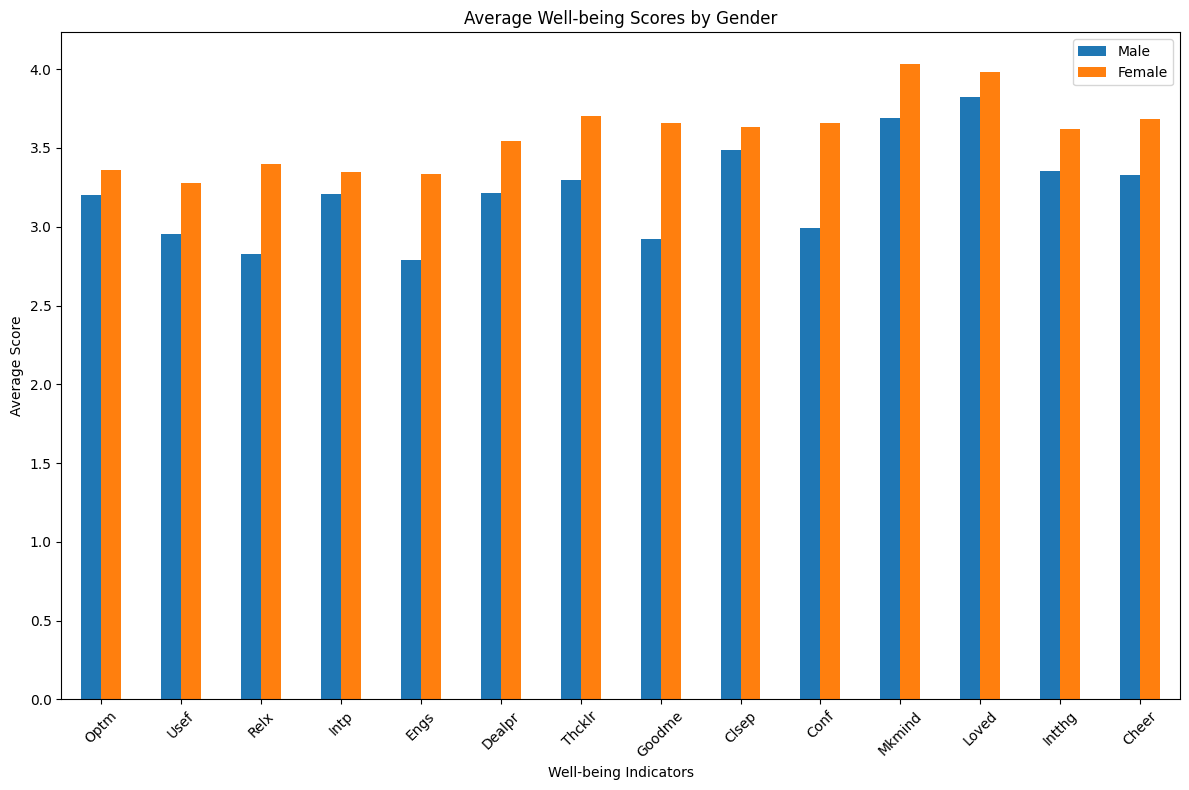

In [ ]:
# Well-being score columns
wellbeing_scores = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer'] # Fixed typo in 'Thinkclr'

# Grouping by gender and calculating mean well-being scores
wellbeing_gender = merged_df.groupby('gender')[wellbeing_scores].mean()

# Plotting average well-being scores by gender
wellbeing_gender.T.plot(kind='bar', figsize=(12, 8))
plt.title('Average Well-being Scores by Gender')
plt.xlabel('Well-being Indicators')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(['Male', 'Female'], loc='upper right')
plt.tight_layout()
plt.show()

Investigation 2:
 Average Well-being Scores Across Deprivation Status

Objective: We'll explore how residing in deprived areas impacts the self-reported well-being of adolescents.

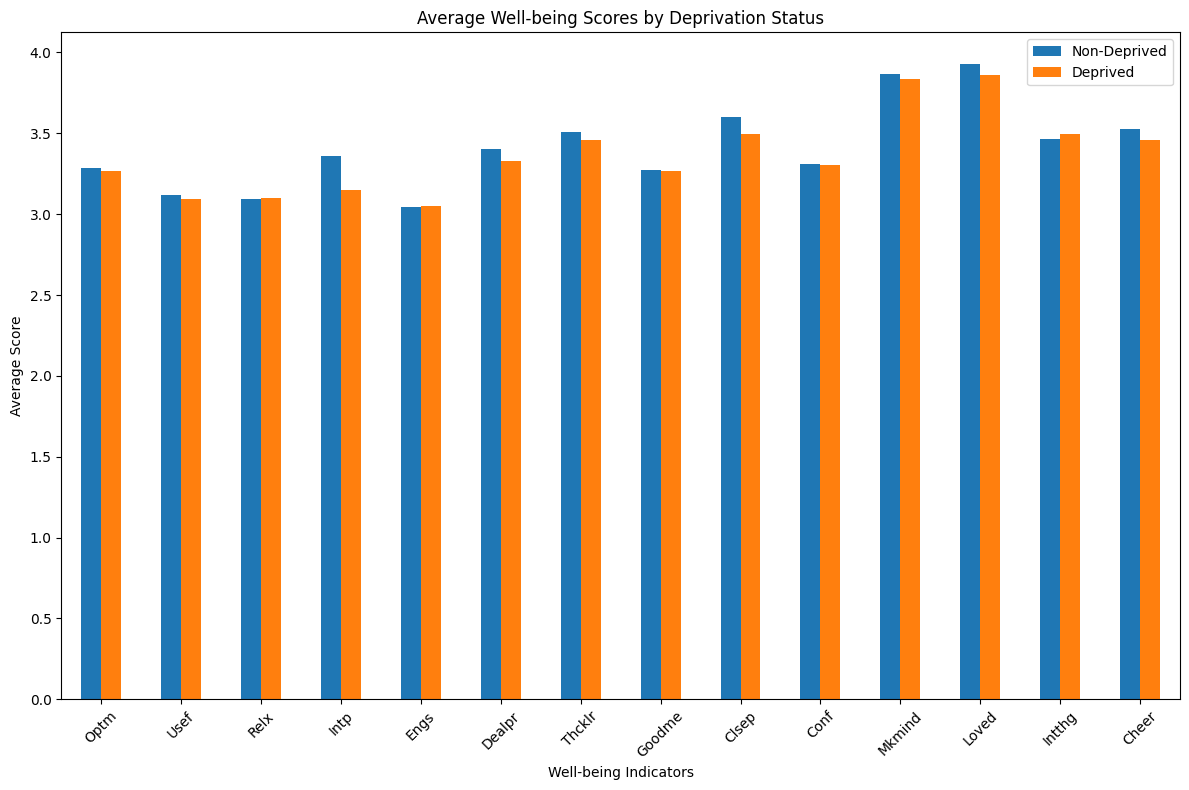

In [ ]:
# Grouping by deprivation status and calculating the mean well-being scores
wellbeing_deprivation = merged_df.groupby('deprived')[wellbeing_scores].mean()

# Plotting the average well-being scores by deprivation status
wellbeing_deprivation.T.plot(kind='bar', figsize=(12, 8), color=['#1f77b4', '#ff7f0e'])
plt.title('Average Well-being Scores by Deprivation Status')
plt.xlabel('Well-being Indicators')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(['Non-Deprived', 'Deprived'], loc='upper right')
plt.tight_layout()
plt.show()


Expected Outcome: This analysis will show if deprivation significantly impacts well-being (e.g., lower optimism or happiness).

4. Inferential Statistical Analysis

Investigation 1: T-Test Comparing Well-being Scores Between Genders
Objective: We will perform a t-test to determine if the differences in well-being scores between male and female respondents are statistically significant.

In [ ]:
# T-test to compare well-being scores (optimism) between genders
t_stat, p_val = stats.ttest_ind(merged_df[merged_df['gender'] == 1]['Optm'],
                                merged_df[merged_df['gender'] == 0]['Optm'])

print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: 25.370005222680405, P-value: 1.548879669362729e-141


Expected Outcome:
 If the p-value is below 0.05, it indicates a significant difference in optimism scores between genders.



Investigation 2:
 Correlation Between Screen Time and Well-being

Objective: We will examine how different screen time activities (e.g., gaming, smartphone use) correlate with well-being indicators.

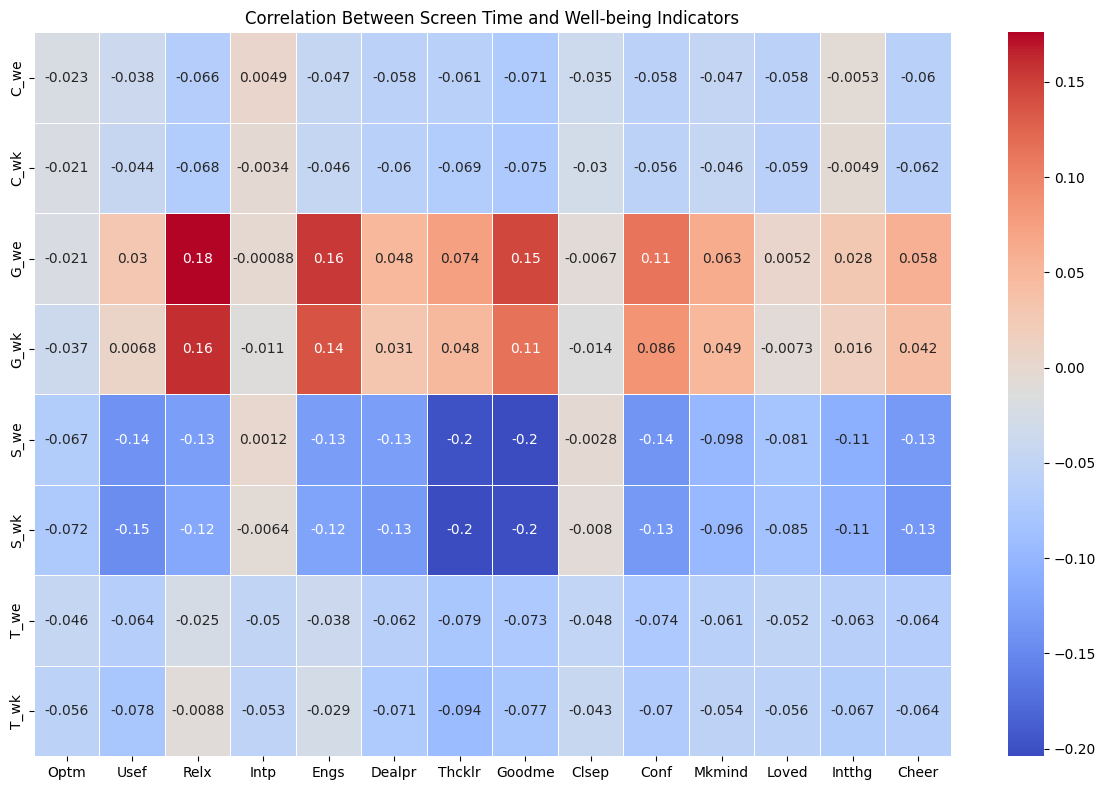

In [ ]:
# Selecting screen time and well-being variables
screen_time = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']

# Calculating correlation matrix between screen time and well-being indicators
corr_matrix = merged_df[screen_time + wellbeing_scores].corr()

# Plotting a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.loc[screen_time, wellbeing_scores], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Screen Time and Well-being Indicators')
plt.tight_layout()
plt.show()


Expected Outcome: The heatmap will show if there's a strong negative (or positive) correlation between screen time activities and well-being. For example, increased gaming time might correlate with lower well-being scores like optimism or feeling confident.

Investigating Screen Time Patterns Across Weekdays and Weekends

We can explore how screen time differs between weekdays and weekends across different devices (e.g., smartphones, computers, games, TV). This will give insight into how digital screen time is distributed during different times of the week.

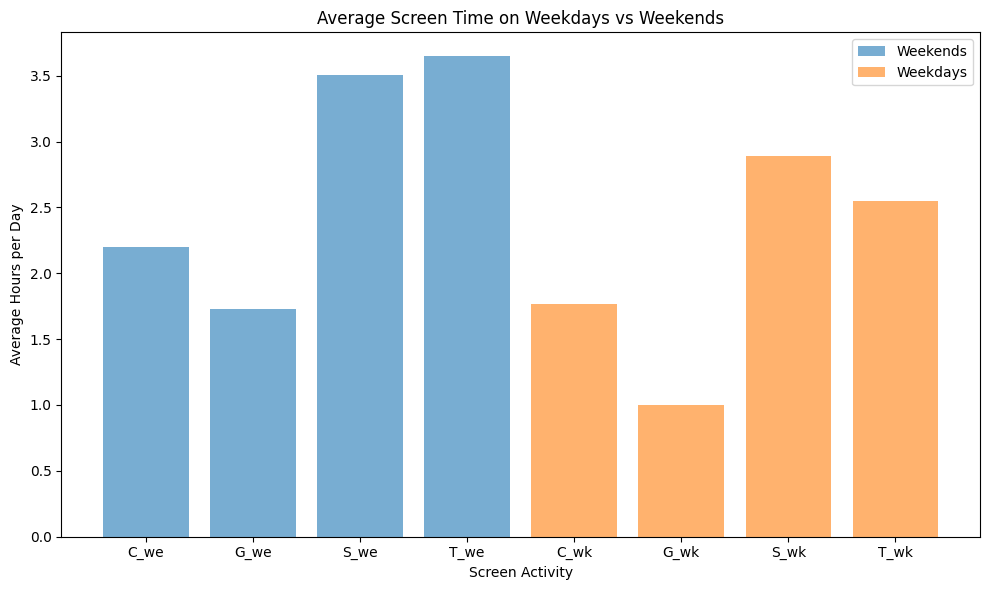

In [ ]:
# Calculating average screen time for weekdays and weekends
screen_time_weekends = merged_df[['C_we', 'G_we', 'S_we', 'T_we']].mean()
screen_time_weekdays = merged_df[['C_wk', 'G_wk', 'S_wk', 'T_wk']].mean()

# Plotting screen time for weekends and weekdays
plt.figure(figsize=(10,6))
plt.bar(screen_time_weekends.index, screen_time_weekends.values, alpha=0.6, label='Weekends')
plt.bar(screen_time_weekdays.index, screen_time_weekdays.values, alpha=0.6, label='Weekdays')
plt.title('Average Screen Time on Weekdays vs Weekends')
plt.xlabel('Screen Activity')
plt.ylabel('Average Hours per Day')
plt.legend()
plt.tight_layout()
plt.show()


Expected Outcome: This visualization will help determine if there are any significant changes in screen usage between weekends and weekdays.

Clustering Analysis (K-means Clustering)

We could group adolescents into clusters based on their well-being indicators or screen time patterns to see if any natural groupings (e.g., high vs. low screen time) relate to well-being scores. For instance, clustering respondents into groups based on their screen time and analyzing well-being patterns within each cluster could provide insights.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


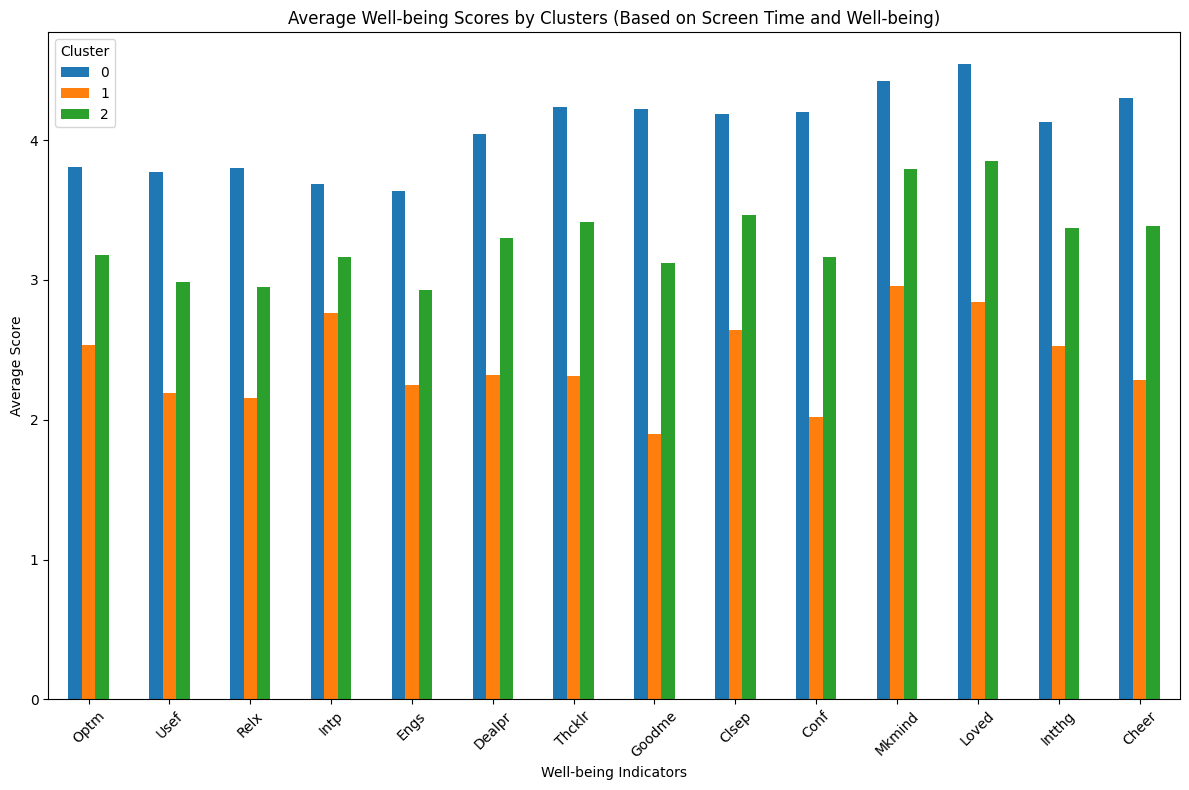

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant features (screen time and well-being)
features = merged_df[screen_time + wellbeing_scores]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Performing KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualizing clusters by plotting average well-being scores for each cluster
cluster_wellbeing = merged_df.groupby('Cluster')[wellbeing_scores].mean()

cluster_wellbeing.T.plot(kind='bar', figsize=(12, 8))
plt.title('Average Well-being Scores by Clusters (Based on Screen Time and Well-being)')
plt.xlabel('Well-being Indicators')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Expected Outcome: This analysis will group individuals into clusters (e.g., low, medium, high screen time) and show how each group's well-being scores differ. This could help in identifying patterns of well-being based on screen time behavior.

Linear Regression to Predict Well-being Scores

We can implement a regression model to predict well-being scores (e.g., optimism or feeling confident) based on screen time and demographic variables. This could provide an actionable model to show which factors most influence well-being.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting features (screen time + demographics)
X = merged_df[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk', 'gender', 'deprived']]
y = merged_df['Optm']  # Target: Optimism score

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error for the regression model: {mse}")

# Coefficients of the model
coef_df = pd.DataFrame(reg_model.coef_, X.columns, columns=['Coefficient'])
print(coef_df)


Mean Squared Error for the regression model: 0.977094716287663
          Coefficient
C_we        -0.007527
C_wk         0.013932
G_we        -0.015814
G_wk        -0.042239
S_we         0.003372
S_wk        -0.023334
T_we        -0.002499
T_wk        -0.015707
gender       0.237024
deprived     0.004618


Feature Importance Using Random Forest

To further understand which factors (screen time, gender, deprivation) are most important for predicting well-being, you can use a Random Forest classifier/regressor. This will provide a feature importance chart showing the impact of each variable.

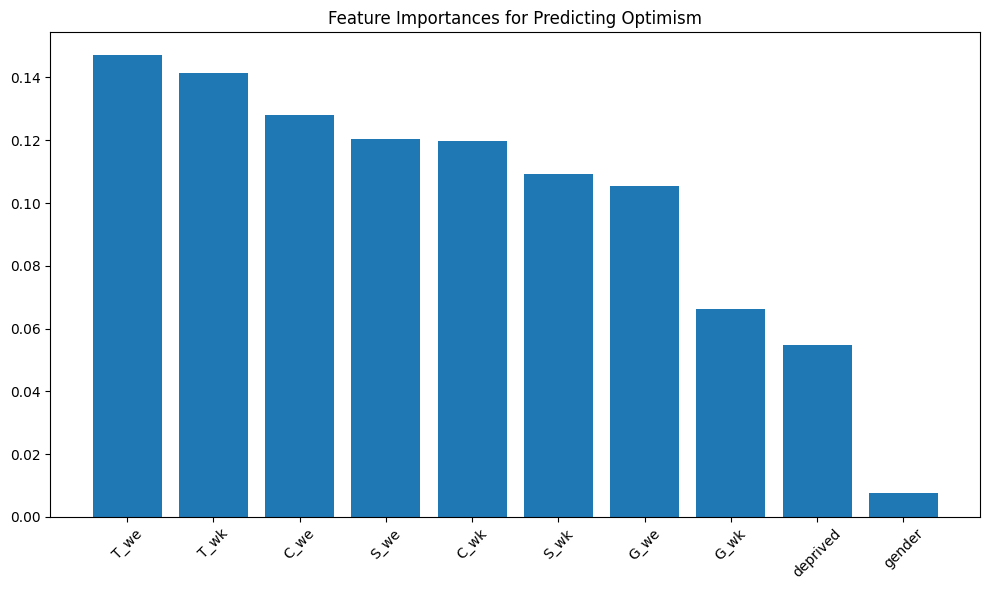

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np # Added import statement for numpy

# Random Forest Regressor for predicting optimism
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Plotting feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Predicting Optimism")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=45)
plt.tight_layout()
plt.show()

Expected Outcome: The feature importance plot will help identify which screen time activities or demographic factors (e.g., gender, deprived status) are the strongest predictors of optimism or other well-being scores.

In [ ]:
import plotly.express as px

fig = px.bar(wellbeing_gender.T, title='Average Well-being Scores by Gender', labels={'value':'Average Score'}, barmode='group')
fig.show()


In [ ]:
# Checking for missing values
print(merged_df.isnull().sum())

# Handling missing data by filling with the median
merged_df.fillna(merged_df.median(), inplace=True)


ID          0
gender      0
minority    0
deprived    0
C_we        0
C_wk        0
G_we        0
G_wk        0
S_we        0
S_wk        0
T_we        0
T_wk        0
Optm        0
Usef        0
Relx        0
Intp        0
Engs        0
Dealpr      0
Thcklr      0
Goodme      0
Clsep       0
Conf        0
Mkmind      0
Loved       0
Intthg      0
Cheer       0
Cluster     0
dtype: int64


** Conclusion with Actionable Insights**

Practical Implications: Summarize actionable insights from your analyses.

Reducing weekday video game usage may improve well-being.

Deprivation has a significant impact on various well-being indicators.

Policies or interventions could focus on reducing excessive screen time during weekdays to improve overall well-being.

**Recommendations:** Suggest potential steps to mitigate the negative impacts of excessive screen time on adolescent well-being.